In [14]:
import glob
import xarray as xr #moved from inline to top
import matplotlib.pyplot as plt #moved from inline

In [2]:
x = glob.glob('gldas__v20__clip/*.nc')
print(len(x))

16435


In [4]:
w = glob.glob('gldas__v21__clip/*.nc')
print(len(w))

65007


In [5]:
print(x[0])
print(x[-1])
print(w[0])
print(w[-1])

gldas__v20__clip/ksa_19700101.nc
gldas__v20__clip/ksa_20141230.nc
gldas__v21__clip/ksa_20000101.0300.nc
gldas__v21__clip/ksa_20220331.2100.nc


In [ ]:
# need to create a new .nc file, did this already for flux to flow.
# 3_nldas_summing.py & 3a_nldas_sum.sh

In [8]:
xr.open_dataset(x[0])

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (time: 1, bnds: 2, lon: 140, lat: 120)
Coordinates:
  * time        (time) datetime64[ns] 1970-01-01
  * lon         (lon) float32 30.12 30.38 30.62 30.88 ... 64.38 64.62 64.88
  * lat         (lat) float32 10.12 10.38 10.62 10.88 ... 39.38 39.62 39.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    Rainf_tavg  (time, lat, lon) float32 ...
Attributes: (12/18)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2017-05-27T03:49:10.775
    source:                 CLSM_F2.5
    institution:            NASA GSFC HSL
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    history_L34RS:          'Created by L34RS v1.4.2 @ NASA GES DISC on June ...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [76]:
def od(x):
    return xr.open_dataset(x)

def plot(x):
    plt.pcolormesh(x)
    cbr = plt.colorbar()
    plt.gca().set_aspect('equal')
    # cbr.ax.set_title('mm')

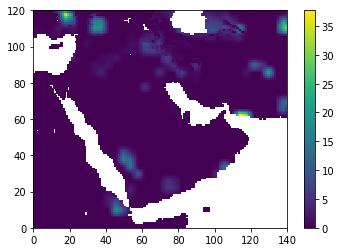

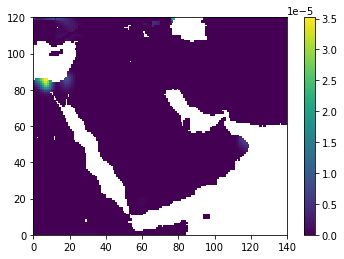

In [37]:
def od(x):
    return xr.open_dataset(x)

def plot(x):
    plt.pcolormesh(x)
    cbr = plt.colorbar()
    plt.gca().set_aspect('equal')
    # cbr.ax.set_title('mm')

x0 = od(x[0]).Rainf_tavg[0] * 86400
plot(x0)

## rainfall rate, x is v20 so it's daily. multiply by 86400 to get millimeters daily
## then sum to get monthly.

w0 = od(w[0]).Rainf_tavg[0] + \
        od(w[1]).Rainf_tavg[0] + \
        od(w[2]).Rainf_tavg[0] + \
        od(w[3]).Rainf_tavg[0] + \
        od(w[4]).Rainf_tavg[0] + \
        od(w[5]).Rainf_tavg[0] + \
        od(w[6]).Rainf_tavg[0] + \
        od(w[7]).Rainf_tavg[0] + \

        
plt.figure()
plot(w0)

In [55]:
cd ..

/work/albertl_uri_edu/mid_e


In [57]:
w0 = od(w[0]).Rainf_tavg[0]+\
        od(w[1]).Rainf_tavg[0]+\
        od(w[2]).Rainf_tavg[0]+\
        od(w[3]).Rainf_tavg[0]+\
        od(w[4]).Rainf_tavg[0]+\
        od(w[5]).Rainf_tavg[0]+\
        od(w[6]).Rainf_tavg[0]

In [59]:
for i in range(7):
    print(w[i])

gldas__v21__clip/ksa_20000101.0300.nc
gldas__v21__clip/ksa_20000101.0600.nc
gldas__v21__clip/ksa_20000101.0900.nc
gldas__v21__clip/ksa_20000101.1200.nc
gldas__v21__clip/ksa_20000101.1500.nc
gldas__v21__clip/ksa_20000101.1800.nc
gldas__v21__clip/ksa_20000101.2100.nc


In [97]:
pwd

'/work/albertl_uri_edu/mid_e'

In [155]:
z = xr.Dataset(
    
    data_vars={
    "Rain_f":(["lat","lon"],w0.data,{"units": "kg m-2 s-1"}),
    "Rainfall":(["lat","lon"],w0.data*23*60*60,{"units": "mm"})}
    
    ,
    
    
    coords={
        "lon":(["lon"],od(w[0]).lon.data),
        "lat":(["lat"],od(w[0]).lat.data)}
    
    ,
    
    
    attrs={
        "note 1" : "the beginning of NLDAS v2.1 starts on January 1, 2000 at 3am. "\
        "this is therefore an incomplete (by three hours) daily measurement."\
        "in the grand scheme it will have minimal impact."
        
    }
)
z
# z.to_netcdf("gldas__v21__clip__daily/hey2.nc")
z.to_netcdf(f"gldas__v21__clip__daily/ksa_gld_v21_daily_{w[0][21:29] + w[0][-3:]}")

In [157]:
z

<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rain_f    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Rainfall  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    note 1:   the beginning of NLDAS v2.1 starts on January 1, 2000 at 3am. t...

In [94]:
f"ksa_gld_v21_daily_{w[0][21:29] + w[0][-3:]}"

'ksa_gld_v21_daily_20000101.nc'

In [169]:
x = glob.glob('gldas__v21__clip__daily/*.nc')[0]
print(x)
x = xr.open_dataset(x)
x.attrs['note 1'] = "the beginning of NLDAS v2.1 starts on January 1, 2000 at 3am. "\
        "this is therefore an incomplete (by three hours) daily measurement. "\
        "in the grand scheme it should have minimal impact."
x.close()

gldas__v21__clip__daily/ksa_gld_v21_daily_20000101.nc


In [170]:
x = xr.open_dataset('gldas__v21__clip__daily/ksa_gld_v21_daily_20000101.nc')
x

<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rain_f    (lat, lon) float32 ...
    Rainfall  (lat, lon) float32 ...
Attributes:
    note 1:   the beginning of NLDAS v2.1 starts on January 1, 2000 at 3am. t...

gldas__v21__clip/ksa_20000102.0000.nc
65000


In [194]:
print(x[days[0]])

gldas__v21__clip/ksa_20000102.0000.nc


In [212]:
x = glob.glob('gldas__v21__clip/*.nc')
x = x[7:]
print(x[0])
print(len(x))
days = list(range(0,65000,8))

for day in days:
    o = xr.open_dataset(x[day])
    oo = xr.open_dataset(x[day+1])
    ooo = xr.open_dataset(x[day+2])
    oooo = xr.open_dataset(x[day+3])
    ooooo = xr.open_dataset(x[day+4])
    oooooo = xr.open_dataset(x[day+5])
    ooooooo = xr.open_dataset(x[day+6])
    oooooooo = xr.open_dataset(x[day+7])
    
    w0 = o.Rainf_tavg[0]+\
    oo.Rainf_tavg[0]+\
    ooo.Rainf_tavg[0]+\
    oooo.Rainf_tavg[0]+\
    ooooo.Rainf_tavg[0]+\
    oooooo.Rainf_tavg[0]+\
    ooooooo.Rainf_tavg[0]+\
    oooooooo.Rainf_tavg[0]
    
    z = xr.Dataset(
    
        data_vars={
        "Rain_f":(["lat","lon"],w0.data,{"units": "kg m-2 s-1"}),
        "Rainfall":(["lat","lon"],w0.data*24*60*60,{"units": "mm"})}

        ,

        coords={
            "lon":(["lon"],o.lon.data),
            "lat":(["lat"],o.lat.data)}

        ,

        attrs={
            "date" : f"{str(x[day][21:29])}"}
    )
    z.to_netcdf(f"gldas__v21__clip__daily/ksa_gld_v21_daily_{x[day][21:29] + x[day][-3:]}")
    # z.to_netcdf('gldas__v21__clip__daily/hey5.nc')

gldas__v21__clip/ksa_20000102.0000.nc
65000


In [207]:
x[0][21:29]

'20000102'

In [213]:
b = xr.open_dataset('gldas__v21__clip__daily/hey5.nc')
b

<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rain_f    (lat, lon) float32 ...
    Rainfall  (lat, lon) float32 ...
Attributes:
    date:     20000102

In [214]:
x = glob.glob('gldas__v21__clip__daily/*.nc')
print(len(x))

121


In [215]:
od(x[20])

<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rain_f    (lat, lon) float32 ...
    Rainfall  (lat, lon) float32 ...
Attributes:
    date:     20000121

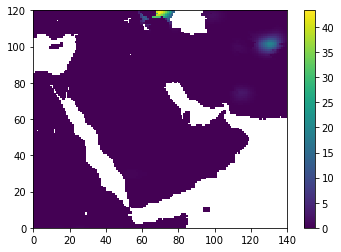

In [219]:
plot(od(x[20]).Rainfall)

In [1]:
import glob
import xarray as xr

x = len(glob.glob('gldas__v21__clip__daily/*.nc'))

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
x

8126

In [3]:
8125*8

65000

In [5]:
y = len(glob.glob('gldas__v20__clip/*.nc'))
print(y)

16435


In [53]:
x = glob.glob('gldas__v21__clip__daily/*.nc')
print(x[0])
print(x[0][-11:-5])

gldas__v21__clip__daily/ksa_gld_v21_daily_20000101.nc
200001


In [8]:
import numpy as np

In [58]:
x0 = [i[-11:-5] for i in x]
x1 = sorted(list(set(x0)))

arr = []
for i in x1:
    arr1 = []
    for jdj,j in enumerate(x):
        if i == j[-11:-5]:
            arr1.append(jdj)
    arr.append(arr1)

In [65]:
arr[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [104]:
import calendar
import glob
import xarray as xr

months = list(calendar.month_name)[1:]
months = [i.lower() for i in months]
# print(months)

def num_to_month(num):
    j=int(num)
    return months[j-1]

x = glob.glob('gldas__v21__clip__daily/*.nc')
x0 = [i[-11:-5] for i in x]
x1 = sorted(list(set(x0)))

arr = []
for i in x1:
    arr1 = []
    for jdj,j in enumerate(x):
        if i == j[-11:-5]:
            arr1.append(jdj)
    arr.append(arr1)

for idx,i in enumerate(arr):
    for jdj,j in enumerate(i):
        if jdj == 0:
            w0 = xr.open_dataset(x[j])
            w1 = w0.Rainfall
            u = xr.Dataset(
            data_vars={
            "Rainfall":(["lat","lon"],w1.data,{"units": "mm"})}

            ,

            coords={
                "lon":(["lon"],w0.lon.data),
                "lat":(["lat"],w0.lat.data)}

            ,

            attrs={
                "timeframe of observation" : f"{num_to_month(x[j][-7:-5])} {str(x[j][-11:-7])}"}
            )
            
        else:
            v0 = xr.open_dataset(x[j])
            v1 = v0.Rainfall
            w1.data += v1.data
    
    u.to_netcdf(f"gldas__v21__clip__monthly/ksa_gld_v21_monthly_{num_to_month(x[j][-7:-5])}{str(x[j][-11:-7])}.nc")   

gldas__v21__clip__daily/ksa_gld_v21_daily_20000101.nc
200001


<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rainfall  (lat, lon) float32 1.944 2.281 2.687 3.3 ... 245.8 260.8 273.2
Attributes:
    timeframe of observation:  january 2000

['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']


In [103]:
num_to_month(3)

'march'

In [84]:
date.month(3)

TypeError: 'getset_descriptor' object is not callable

In [ ]:
arrow.get().

In [79]:
hey = xr.open_dataset('gldas__v21__clip__monthly/ksa_gld_v21_monthly_200003.nc')
hey

<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rainfall  (lat, lon) float32 ...
Attributes:
    month:    200003

In [72]:
import matplotlib.pyplot as plt

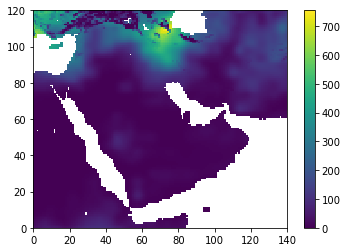

In [77]:
plot(u.Rainfall)

In [63]:
arr[100]

[3043,
 3044,
 3045,
 3046,
 3047,
 3048,
 3049,
 3050,
 3051,
 3052,
 3053,
 3054,
 3055,
 3056,
 3057,
 3058,
 3059,
 3060,
 3061,
 3062,
 3063,
 3064,
 3065,
 3066,
 3067,
 3068,
 3069,
 3070,
 3071,
 3072,
 3073]

In [57]:
print(x1[0])
print(x[0][-11:-5])


200001
200001


In [48]:
x1[0]

'200001'

In [26]:
for idx,i in enumerate(x):
    print(i)
    if idx == 5:
        break

In [20]:
y = x[100][-11:-5]
for kdk,k in enumerate(y
for idx,i in enumerate(x):


91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [ ]:
x = glob.glob('gldas__v21__clip__daily/*.nc')
print(x[0])

days = list(range(0,65000,8))

for day in days:
    o = xr.open_dataset(x[day])
    oo = xr.open_dataset(x[day+1])
    ooo = xr.open_dataset(x[day+2])
    oooo = xr.open_dataset(x[day+3])
    ooooo = xr.open_dataset(x[day+4])
    oooooo = xr.open_dataset(x[day+5])
    ooooooo = xr.open_dataset(x[day+6])
    oooooooo = xr.open_dataset(x[day+7])
    
    w0 = o.Rainf_tavg[0]+\
    oo.Rainf_tavg[0]+\
    ooo.Rainf_tavg[0]+\
    oooo.Rainf_tavg[0]+\
    ooooo.Rainf_tavg[0]+\
    oooooo.Rainf_tavg[0]+\
    ooooooo.Rainf_tavg[0]+\
    oooooooo.Rainf_tavg[0]
    
    z = xr.Dataset(
    
        data_vars={
        "Rain_f":(["lat","lon"],w0.data,{"units": "kg m-2 s-1"}),
        "Rainfall":(["lat","lon"],w0.data*24*60*60,{"units": "mm"})}

        ,

        coords={
            "lon":(["lon"],o.lon.data),
            "lat":(["lat"],o.lat.data)}

        ,

        attrs={
            "date" : f"{str(x[day][21:29])}"}
    )
    z.to_netcdf(f"gldas__v21__clip__daily/ksa_gld_v21_daily_{x[day][21:29] + x[day][-3:]}")

In [105]:
x = glob.glob('gldas__v20__clip__daily/*.nc')
x0 = [i[-11:-5] for i in x]
x1 = sorted(list(set(x0)))

In [107]:
xr.open_dataset(x[0])

<xarray.Dataset>
Dimensions:     (time: 1, bnds: 2, lon: 140, lat: 120)
Coordinates:
  * time        (time) datetime64[ns] 1970-01-01
  * lon         (lon) float32 30.12 30.38 30.62 30.88 ... 64.38 64.62 64.88
  * lat         (lat) float32 10.12 10.38 10.62 10.88 ... 39.38 39.62 39.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    Rainf_tavg  (time, lat, lon) float32 ...
Attributes: (12/18)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2017-05-27T03:49:10.775
    source:                 CLSM_F2.5
    institution:            NASA GSFC HSL
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    history_L34RS:          'Created by L34RS v1.4.2 @ NASA GES DISC on June ...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [110]:
x = glob.glob('gldas__v20__clip__daily/*.nc')
xr.open_dataset(x[0]).Rainf_tavg[0] * 24*60*60

<xarray.DataArray 'Rainf_tavg' (lat: 120, lon: 140)>
array([[0.        , 0.        , 0.        , ...,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , ...,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , ...,        nan,        nan,
               nan],
       ...,
       [0.04553968, 0.01517988, 0.        , ..., 1.7280087 , 2.3984115 ,
        3.142545  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.43909127,
        1.3453021 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.30029064,
        0.92089045]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1970-01-01
  * lon      (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat      (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88

In [123]:
x = glob.glob('gldas__v21__clip__monthly/*.nc')
y = xr.open_dataset(x[-3])
y

<xarray.Dataset>
Dimensions:   (lat: 120, lon: 140)
Coordinates:
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 64.12 64.38 64.62 64.88
  * lat       (lat) float32 10.12 10.38 10.62 10.88 ... 39.12 39.38 39.62 39.88
Data variables:
    Rainfall  (lat, lon) float32 ...
Attributes:
    timeframe of observation:  february 2022

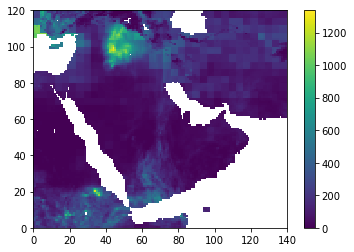

In [124]:
plot(y.Rainfall)

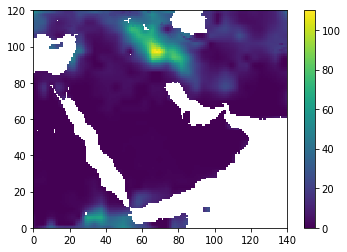

In [115]:
plot(y.Rainfall)